In [5]:
import os
from tqdm import tnrange, tqdm_notebook, tqdm
import numpy as np
import cv2
import h5py
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import json

In [2]:
test_root = "../data/First_round_data/jinnan2_round1_test_a_20190306"
train_root = "../data/First_round_data/jinnan2_round1_train_20190305"

In [3]:
def pre_train_data(path):
    meta_json = json.load(open(os.path.join(path, 'train_no_poly.json'), 'r'))
    
    images_info = meta_json['images']
    annotations = meta_json['annotations']
    
    with h5py.File('../data/First_round_data/train.h5', 'w') as hf:
    
        for i in tqdm_notebook(range(len(annotations))):
#         for i, annotation in enumerate(annotations):
            annotation = annotations[i]
    
            image_info = images_info[annotation['image_id']]

            bbox = annotation['bbox']
            category_id = annotation['category_id']
        
            label = [category_id]
            label.extend(bbox)
            
            image_name = image_info['file_name']
            image_height = image_info['height']
            image_width = image_info['width']
            
            image = cv2.imread(os.path.join(path, 'restricted', image_name))
            
            Xset = hf.create_dataset(
                name='X'+str(i),
                data=image,
                shape=(image_height, image_width, 3),
                maxshape=(image_height, image_width, 3),
                compression="gzip",
                compression_opts=9)
    
            yset = hf.create_dataset(
                name='y'+str(i),
                data=(label),
                shape=(5,),
                maxshape=(5,),
                compression="gzip",
                compression_opts=9)
    
#             print('%s: category: %s bbox: %s' % (image_name, category_id, bbox))

In [4]:
pre_train_data(train_root)

[  3 961 285  59  93]


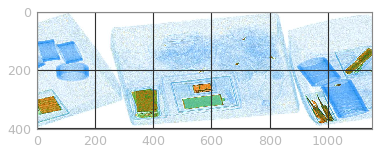

In [10]:
with h5py.File('../data/First_round_data/train.h5', 'r') as hf:
    plb.imshow(hf["X66"])
    print(hf['y66'].value)